In [3]:
import numpy as np
import sounddevice as sd

import matplotlib.pyplot as plt

### Generating a sinusoidal signal
- To specify this, we need a vector `t`. A time vector. An independent vector.
- linspace can help with this. plugging this vector into `x(t) = sin(2*pi*f*t)` will give us what we want.
- can be plotted with matplotlib.

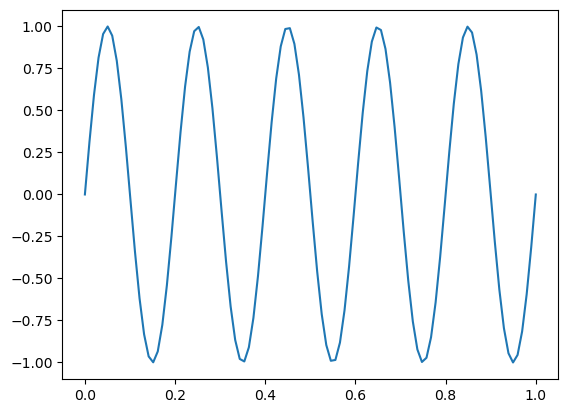

In [5]:
t = np.linspace(0, 1, 100) # Describing the vector
f = 5 
x = np.sin(2*np.pi*f*t) # plugging t into x(t)
plt.plot(t, x)

It changes 5 times. It's a 5Hz sinusoidal signal.

What happens when f is 0?

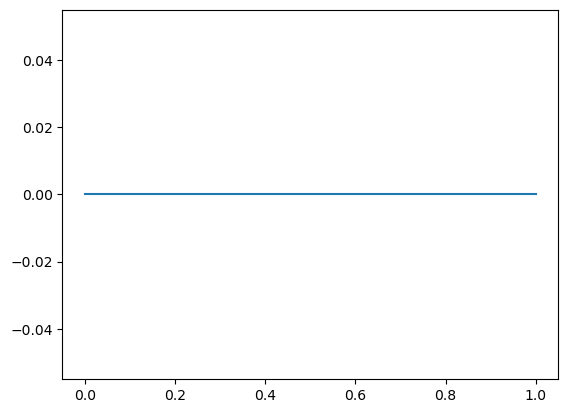

In [6]:
t = np.linspace(0, 1, 100) # Describing the vector
f = 0 
x = np.sin(2*np.pi*f*t) # plugging t into x(t)
plt.plot(t, x)

This signal has no variation in Amplitude. It's called a DC signal.

Replacing sin with cos?

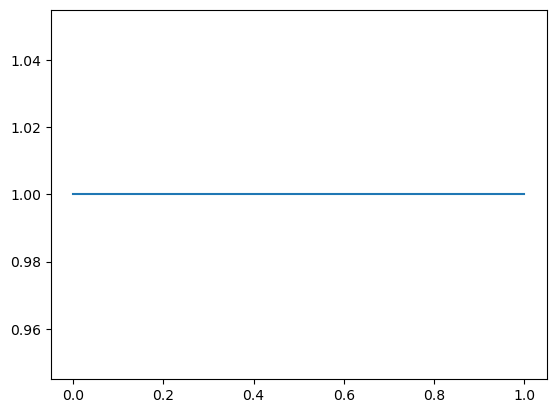

In [7]:
t = np.linspace(0, 1, 100) # Describing the vector
f = 0 
x = np.cos(2*np.pi*f*t) # plugging t into x(t)
plt.plot(t, x)

Also a DC signal. A signal that doesn't exhibit any variation in amplitude.

### HEARING A SINE WAVE
- That's what `sounddevice` is for.
- We need good samples. Because of the hearing range.
- F<sub>s</sub>  is sampling freq. *f* is signal frequency.

In [14]:
sampling_frequency = 8000 # 8kHz? We take 8000 samples in a second.
t = np.linspace(0, 1, sampling_frequency)

signal_frequency = 1000 # 1kHz? We're just taking some value in the hearing range.
x = np.sin(2*np.pi*signal_frequency*t)

sd.play(x, sampling_frequency)

That was a single note.

Let's try some variations.

In [20]:
sampling_frequency = 8000 # 8kHz? We take 8000 samples in a second.
t = np.linspace(0, 1, sampling_frequency)

signal_frequency = input()
x = np.sin(2*np.pi*signal_frequency*t)

sd.play(x, sampling_frequency)

0


TypeError: can't multiply sequence by non-int of type 'float'

Multiple component signals

In [ ]:
sampling_frequency = 8000 # 8kHz? We take 8000 samples in a second.
t = np.linspace(0, 1, sampling_frequency)

# Multiple components of signal frequency
f1 = 1000
f2 = 2000
f3 = 3000

x1 = np.sin(2*np.pi*f1*t)
x2 = np.sin(2*np.pi*f2*t)
x3 = np.sin(2*np.pi*f3*t)
x = np.concatenate([x1, x2, x3])

sd.play(x, sampling_frequency)

Inferences
- Change in frequencies happen. 1000 -> 2000 -> 3000
- Higher frequencies are more irritating?? The _shriekness_ increases.

Let's try modifying the `t` component.

`x(t) = sin(2*pi*f*t)` is a stationary signal. <br>
`x(t) = sin(2*pi*f*(t^2))` is a non-stationary signal. The frequency varies with respect to time. It starts off with a lesser f and becomes more and more frequent. 

In [27]:
sampling_frequency = 8000 # 8kHz? We take 8000 samples in a second.
t = np.linspace(0, 1, sampling_frequency)

signal_frequency = -1000 # NEGATIVE FREQUENCY ???????????? Nothing actually changes
x = np.sin(2 * np.pi * signal_frequency * t)

sd.play(x, sampling_frequency)

Task: `Sa Re Ga Ma Pa Dha Ni Sa` time

In [28]:
sampling_frequency = 8000 # 8kHz? We take 8000 samples in a second.
t = np.linspace(0, 1, sampling_frequency)

x = np.concatenate([np.sin(2*np.pi*f*t) for f in [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000]])

sd.play(x, sampling_frequency)

### Learning:
- Generating a sine wave of 1 note.
- Generating of a stationary and non-stationary multiple freq components.

Now,

### Aliasing

Objective: HEAR ALIASING

- Aliasing is undesirable.
- We can overcome aliasing by choosing proper frequency.
- Generate one note of _f_.
- Fix F<sub>s</sub>. Vary the _f_. Also remember Shannon's F<sub>s</sub> >= 2*_f<sub>max</sub>_

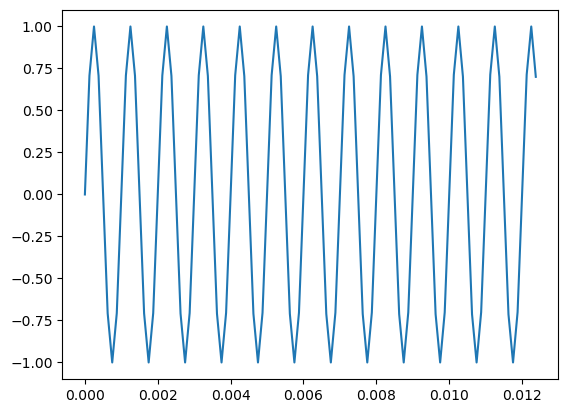

In [48]:
sampling_frequency = 8000
t = np.linspace(0, 1, sampling_frequency)

signal_frequency = 1000 # 1000 was clear > 2000 was clear > 4001 violates SHANNON's THEOREM. > 5000 was aliasing 3000 😲 > 9000 was aliasing 1000.
x = np.sin(2 * np.pi * signal_frequency * t)

sd.play(x, sampling_frequency)
plt.plot(t[0:100],x[0:100]) # Useful for checking aliasing

# Tasks

Generate some moosic

In [59]:
# Define note frequencies (you can adjust these if needed)
note_frequencies = {
    'g': 392,  # G
    'a': 440,  # A
    'b': 493,  # B
    'c': 523,  # C
    'd': 587,  # D
    'e': 659,  # E
    'f': 698,  # F
}

# Convert piano notes to frequencies
def note_to_frequency(note):
    return note_frequencies.get(note.lower(), 0)

# Parse the piano notes
piano_notes = """
4|g-e-a-e-F-g-e-b-a-g-F-e-d-|
4|g-e-a-e-F-g-e-b-a-g-F-e-d-|
4|g-e-a-e-F-g-e-b-a-g-F-e-d-|
4|g-e-a-e-F-g-e-b-a-g-F-e-d-|
4|e-g-e-a-e-F-g-e-b-a-g-F-e-|
"""

# Set the tempo (beats per minute)
tempo_bpm = 360

# Calculate the duration of each note
def note_duration():
    return 60 / tempo_bpm

# Split the notes and play them
for line in piano_notes.split('\n'):
    if line.strip():
        for note in line.split('-'):
            if note.strip():
                frequency = note_to_frequency(note.strip())
                if frequency:
                    duration = note_duration()
                    t = np.linspace(0, duration, int(8000 * duration))
                    sine_wave = np.sin(2 * np.pi * frequency * t)
                    sd.play(sine_wave, 8000)
                    sd.wait()  # Wait for playback to finish

KeyboardInterrupt: 